In [1]:
from ipywidgets import widgets, interact, fixed
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import locale
import sys 
import os 
import matplotlib.pyplot as plt

# Add the higher-level directory containing the module to the sys.path 
module_path = os.path.abspath(os.path.join('..', 'libs')) 
if module_path not in sys.path: 
    sys.path.append(module_path) # Import the class from the module from your_module import


from ReportData import *
from ReportGraphs import *

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# setup reports class
ReportsClass = ReportData(copy_file=False,use_copied_file=False)

## Robert 401k Contributions Left

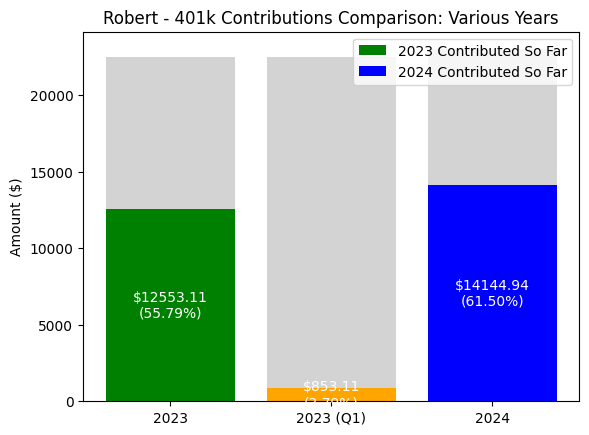

In [5]:
df = ReportsClass.get_yearly_contributions_left(type='401k', owner='Robert')
bar_chart_contributions_left(df, ReportsClass.current_year, ReportsClass.previous_year, '401k', 'Robert')

## Amanda 401k Contributions Left

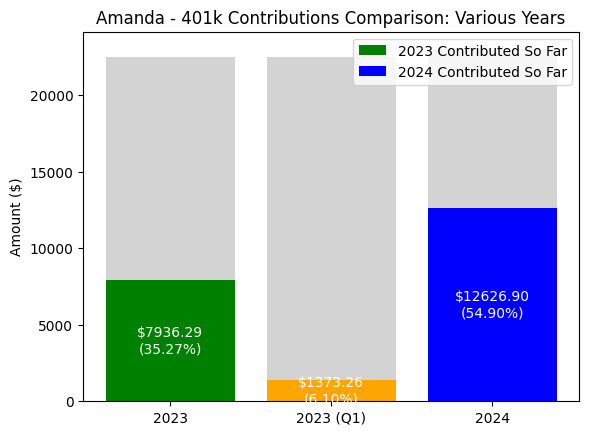

In [6]:
df = ReportsClass.get_yearly_contributions_left(type='401k', owner='Amanda')
bar_chart_contributions_left(df, ReportsClass.current_year, ReportsClass.previous_year, '401k', 'Amanda')

## HSA Year Contributions Left

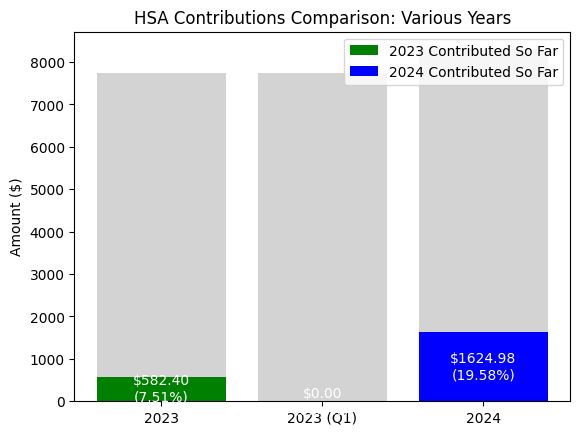

In [4]:
df = ReportsClass.get_yearly_contributions_left(type='HSA')
bar_chart_contributions_left(df, ReportsClass.current_year, ReportsClass.previous_year, 'HSA')